In [ ]:
data = []
labels = []

def create_label(idx):
    vec = np.zeros(16)
    vec[idx] = 1
    return vec

v= f'precut/{os.listdir("precut")[4]}'
cap = cv.VideoCapture(v)
cap.set(cv.CAP_PROP_POS_FRAMES,800)

In [ ]:
current_frame = cap.get(cv.CAP_PROP_POS_FRAMES)
cap.set(cv.CAP_PROP_POS_FRAMES,current_frame+10)
ret, frame = cap.read()
plt.imshow(frame)


In [ ]:
num = 15


img  = frame[num_left[0]:num_left[1], num_left[2]:num_left[3]]
# img  = frame[num_right[0]:num_right[1], num_right[2]:num_right[3]]
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
thr = cv.threshold(grey, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)[1]
plt.imshow(thr)
pytesseract.image_to_string(thr)

In [ ]:
data.append(thr)
labels.append(create_label(num))

In [ ]:
np.savez('classifierdata4', data=data, labels=labels)

In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [81]:
# Model / data parameters
num_classes = 16
input_shape = (15, 20, 1)

npz = np.load('classifierdata3.npz')
x_train, y_train = np.array(npz['data']), npz['labels']


In [82]:


# the data, split between train and test sets
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (248, 15, 20, 1)
248 train samples
10000 test samples


In [83]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 13, 18, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 9, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 3, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 384)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)               

In [84]:
batch_size = 64
epochs = 1500

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.05)

Epoch 1/1500
4/4 [==============================] - 1s 56ms/step - loss: 2.7619 - accuracy: 0.0468 - val_loss: 2.7656 - val_accuracy: 0.0000e+00
Epoch 2/1500
4/4 [==============================] - 0s 17ms/step - loss: 2.6899 - accuracy: 0.1277 - val_loss: 2.6857 - val_accuracy: 0.0000e+00
Epoch 3/1500
4/4 [==============================] - 0s 16ms/step - loss: 2.6003 - accuracy: 0.2383 - val_loss: 2.6107 - val_accuracy: 0.0000e+00
Epoch 4/1500
4/4 [==============================] - 0s 16ms/step - loss: 2.5422 - accuracy: 0.2511 - val_loss: 2.5968 - val_accuracy: 0.0000e+00
Epoch 5/1500
4/4 [==============================] - 0s 17ms/step - loss: 2.4638 - accuracy: 0.2596 - val_loss: 2.5238 - val_accuracy: 0.0000e+00
Epoch 6/1500
4/4 [==============================] - 0s 19ms/step - loss: 2.3704 - accuracy: 0.2809 - val_loss: 2.4752 - val_accuracy: 0.2308
Epoch 7/1500
4/4 [==============================] - 0s 16ms/step - loss: 2.2974 - accuracy: 0.3277 - val_loss: 2.4279 - val_accuracy: 

Epoch 116/1500
4/4 [==============================] - 0s 17ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 117/1500
4/4 [==============================] - 0s 16ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 118/1500
4/4 [==============================] - 0s 18ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 119/1500
4/4 [==============================] - 0s 16ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0369 - val_accuracy: 1.0000
Epoch 120/1500
4/4 [==============================] - 0s 16ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0384 - val_accuracy: 1.0000
Epoch 121/1500
4/4 [==============================] - 0s 18ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 1.0000
Epoch 122/1500
4/4 [==============================] - 0s 17ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 1.0000

KeyboardInterrupt: 

(<matplotlib.image.AxesImage at 0x1ed1634c970>, 15)

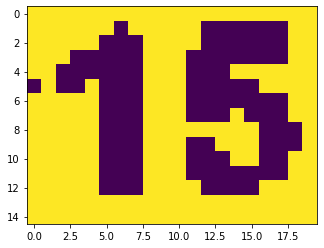

In [99]:
def vec_int(vec):
    return np.argmax(vec)
im = x_train[np.random.randint(0, len(x_train))]
vec = model(im[tf.newaxis,:])
plt.imshow(im), vec_int(vec)

In [100]:
model.save('score_classifier')

INFO:tensorflow:Assets written to: score_classifier\assets


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [102]:
import math
math.ceil(0.5)

1